# Milestone-3

In [35]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Tasks of Milestone - 3
* To perform Isolation forest with the visualization of anomalies.
* To perform Elliptic Envelope algorithm with visualization.
* To perform OneClassSvm algorithms.
 

## Read the data 

In [36]:
# preprocessed dataset for visulization of categorical features
org_df=pd.read_csv('preprocessed.csv')
org_df.head()

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,MD,F,I,SAINT LOUIS,MO,US,Internal Medicine,Y,F,99223,N,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,MD,F,I,FAYETTEVILLE,NC,US,Obstetrics & Gynecology,Y,O,G0202,N,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,DPM,M,I,NORTH HAVEN,CT,US,Podiatry,Y,O,99348,N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,MD,M,I,KANSAS CITY,MO,US,Internal Medicine,Y,O,81002,N,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,DO,M,I,JUPITER,FL,US,Internal Medicine,Y,O,96372,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576


In [37]:
# Encoded dataset for the machine learning model training and anomay detectiona
df=pd.read_csv('encoded.csv')
df.head()

,Credentials of the Provider,City of the Provider,State Code of the Provider,Provider Type,HCPCS Code,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,...,Country Code of the Provider_DE,Country Code of the Provider_JP,Country Code of the Provider_TR,Country Code of the Provider_US,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,Place of Service_F,Place of Service_O,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y
0,73827,500,1997,11366,1297,27.0,24.0,27.0,200.587778,305.211111,...,False,False,False,True,False,True,True,False,True,False
1,73827,209,3725,1028,243,175.0,175.0,175.0,123.730000,548.800000,...,False,False,False,True,False,True,False,True,True,False
2,1915,10,1403,2027,44,32.0,13.0,32.0,90.650000,155.000000,...,False,False,False,True,False,True,False,True,True,False
3,73827,317,1997,11366,460,20.0,18.0,20.0,3.500000,5.000000,...,False,False,False,True,False,True,False,True,True,False
4,6176,51,7263,11366,732,33.0,24.0,31.0,26.520000,40.000000,...,False,False,False,True,False,True,False,True,True,False


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Credentials of the Provider                               100000 non-null  int64  
 1   City of the Provider                                      100000 non-null  int64  
 2   State Code of the Provider                                100000 non-null  int64  
 3   Provider Type                                             100000 non-null  int64  
 4   HCPCS Code                                                100000 non-null  int64  
 5   Number of Services                                        100000 non-null  float64
 6   Number of Medicare Beneficiaries                          100000 non-null  float64
 7   Number of Distinct Medicare Beneficiary/Per Day Services  100000 non-null  float64
 8   Avera

## Standardized the data

In [39]:
# Standardized the data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

numerical_cols=df.iloc[:,:12].columns
scaled_data=ss.fit_transform(df[numerical_cols])
temp_df=pd.DataFrame(scaled_data,columns=df.iloc[:,:12].columns)
temp_df.head()

,Credentials of the Provider,City of the Provider,State Code of the Provider,Provider Type,HCPCS Code,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,0.594983,1.571686,-0.737342,1.336743,0.397579,-0.085301,-0.059308,-0.070183,0.385450,-0.046433,0.400082,0.414299
1,0.594983,0.189180,-0.004973,-0.940500,-0.439989,-0.025939,0.076775,0.020049,0.086673,0.182805,0.207649,0.286359
2,-1.684316,-0.756245,-0.989093,-0.720441,-0.598126,-0.083296,-0.069222,-0.067135,-0.041922,-0.187794,-0.064687,-0.087154
3,0.594983,0.702275,-0.737342,1.336743,-0.267549,-0.088109,-0.064716,-0.074451,-0.380709,-0.328957,-0.370166,-0.372921
4,-1.549260,-0.561459,1.494517,1.336743,-0.051402,-0.082895,-0.059308,-0.067744,-0.291221,-0.296019,-0.289505,-0.294800


In [40]:
scaled_df=temp_df.join(df.iloc[:,12:])
scaled_df.head()

,Credentials of the Provider,City of the Provider,State Code of the Provider,Provider Type,HCPCS Code,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,...,Country Code of the Provider_DE,Country Code of the Provider_JP,Country Code of the Provider_TR,Country Code of the Provider_US,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,Place of Service_F,Place of Service_O,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y
0,0.594983,1.571686,-0.737342,1.336743,0.397579,-0.085301,-0.059308,-0.070183,0.385450,-0.046433,...,False,False,False,True,False,True,True,False,True,False
1,0.594983,0.189180,-0.004973,-0.940500,-0.439989,-0.025939,0.076775,0.020049,0.086673,0.182805,...,False,False,False,True,False,True,False,True,True,False
2,-1.684316,-0.756245,-0.989093,-0.720441,-0.598126,-0.083296,-0.069222,-0.067135,-0.041922,-0.187794,...,False,False,False,True,False,True,False,True,True,False
3,0.594983,0.702275,-0.737342,1.336743,-0.267549,-0.088109,-0.064716,-0.074451,-0.380709,-0.328957,...,False,False,False,True,False,True,False,True,True,False
4,-1.549260,-0.561459,1.494517,1.336743,-0.051402,-0.082895,-0.059308,-0.067744,-0.291221,-0.296019,...,False,False,False,True,False,True,False,True,True,False


In [41]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Credentials of the Provider                               100000 non-null  float64
 1   City of the Provider                                      100000 non-null  float64
 2   State Code of the Provider                                100000 non-null  float64
 3   Provider Type                                             100000 non-null  float64
 4   HCPCS Code                                                100000 non-null  float64
 5   Number of Services                                        100000 non-null  float64
 6   Number of Medicare Beneficiaries                          100000 non-null  float64
 7   Number of Distinct Medicare Beneficiary/Per Day Services  100000 non-null  float64
 8   Avera

# Anomaly detection

# 1- Isolation Forest 

In [42]:
from sklearn.ensemble import IsolationForest
# Step 1: Use the scaled dataset (final_df)
# Step 2: Apply Isolation Forest
iso_forest=IsolationForest(n_estimators=200,contamination=0.01,random_state=42)
iso_forest.fit(scaled_df)
anomaly_labels=iso_forest.predict(scaled_df)

In [43]:
df[anomaly_labels==-1]

,Credentials of the Provider,City of the Provider,State Code of the Provider,Provider Type,HCPCS Code,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,...,Country Code of the Provider_DE,Country Code of the Provider_JP,Country Code of the Provider_TR,Country Code of the Provider_US,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,Place of Service_F,Place of Service_O,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y
221,73827,592,1997,447,17,13.0,13.0,13.0,1686.694615,6785.660000,...,False,False,False,True,False,True,True,False,True,False
224,73827,7,3333,507,645,78.0,78.0,78.0,191.303846,209.564359,...,False,False,False,True,False,True,False,True,False,True
340,73827,298,787,512,19,19.0,18.0,18.0,1311.228947,6343.348421,...,False,False,False,True,False,True,True,False,True,False
375,73827,244,1994,999,3,13.0,13.0,13.0,3102.210000,7884.615385,...,False,False,False,True,False,True,False,True,True,False
439,73827,406,1753,1745,24,149.0,57.0,149.0,4213.732148,7374.000000,...,False,False,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99640,73827,96,1423,512,6,27.0,23.0,25.0,777.024815,1525.000000,...,False,False,False,True,False,True,True,False,True,False
99678,73827,2,3333,1240,438,4140.0,2995.0,4140.0,13.320000,82.169345,...,False,False,False,True,False,True,False,True,True,False
99774,73827,28,1520,512,5,13.0,13.0,13.0,550.430769,3408.050000,...,False,False,False,True,False,True,True,False,True,False
99914,73827,5,7775,512,13,34.0,25.0,34.0,3605.580000,8500.000000,...,False,False,False,True,False,True,True,False,True,False


* These above are the rows which are anomalies in the dataset
* There are 1000 anomalies present in the dataset

## Visualization for the isolation forest results

**Scatter plots for the isolation forest** 

In [44]:
# Map the anomaly labels to colors
colors = np.array(['b', 'r'])  # Normal points: blue, Anomalies: orange
anomaly_colors = np.where(anomaly_labels == 1, colors[0], colors[1])

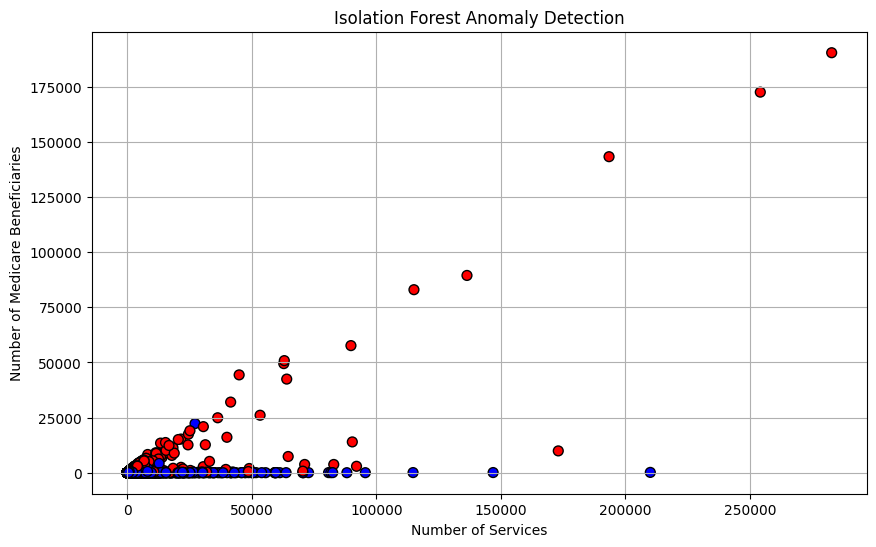

In [45]:
# Plot the graph of the result of Isolation forest b/w 'Number of Services' and 'Number of Medicare Beneficiaries'
# Step 3: Visualize the results
features = df[['Number of Services', 'Number of Medicare Beneficiaries']].values
plt.figure(figsize=(10, 6))
plt.scatter(features[:, 0], features[:, 1], c=anomaly_colors, marker='o', edgecolor='k', s=50)
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Number of Services')
plt.ylabel('Number of Medicare Beneficiaries')
plt.grid(True)
plt.show()

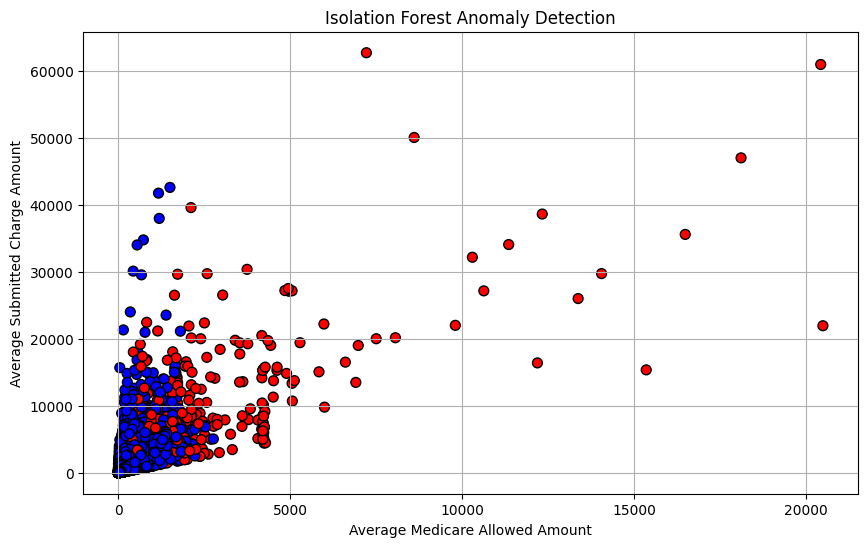

In [46]:
# plot the graph between 'Average Medicare Allowed Amount' and 'Average Submitted Charge Amount'
plt.figure(figsize=(10, 6))
plt.scatter(x=df.loc[:,'Average Medicare Allowed Amount'],
            y=df.loc[:,'Average Submitted Charge Amount'],c=anomaly_colors, marker='o', edgecolor='k', s=50)
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Average Medicare Allowed Amount')
plt.ylabel('Average Submitted Charge Amount')
plt.grid(True)
plt.show()

* Above plot shows that the red point are the anomalies and the blue points are the Normal datapoint.

**Bar plot for the catogorical features**

In [47]:
# Create a column as Amomaly Isolations forest which is having Normal and Anomaly category for each row
org_df['Anomaly IsolationForest']=anomaly_labels
org_df['Anomaly IsolationForest'] = org_df['Anomaly IsolationForest'].replace({1: 'Normal', -1: 'Anomaly'})

In [48]:
org_df.head()

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Anomaly IsolationForest
0,MD,F,I,SAINT LOUIS,MO,US,Internal Medicine,Y,F,99223,N,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889,Normal
1,MD,F,I,FAYETTEVILLE,NC,US,Obstetrics & Gynecology,Y,O,G0202,N,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257,Normal
2,DPM,M,I,NORTH HAVEN,CT,US,Podiatry,Y,O,99348,N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937,Normal
3,MD,M,I,KANSAS CITY,MO,US,Internal Medicine,Y,O,81002,N,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000,Normal
4,DO,M,I,JUPITER,FL,US,Internal Medicine,Y,O,96372,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576,Normal


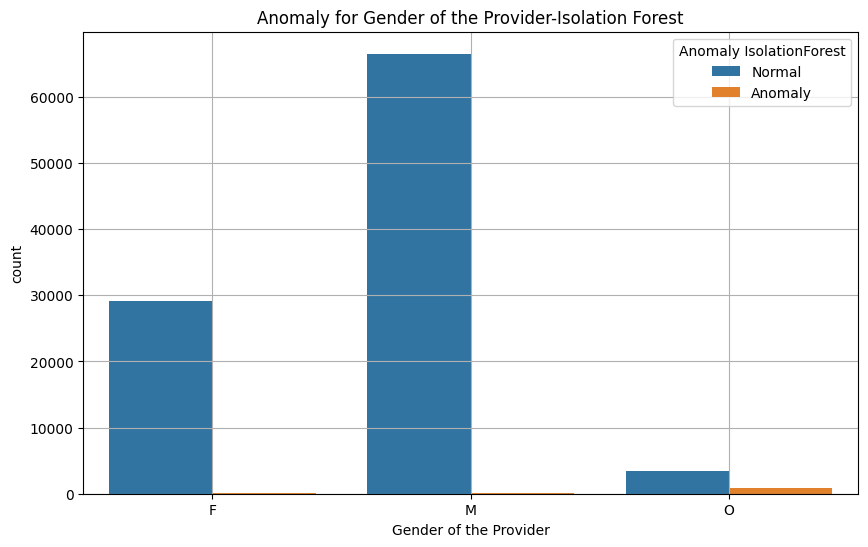

In [49]:
# count plot for Gender of the Provider
plt.figure(figsize=(10, 6))
sns.countplot(org_df,x='Gender of the Provider',hue='Anomaly IsolationForest')
plt.title('Anomaly for Gender of the Provider-Isolation Forest')
plt.grid(True)
plt.show()

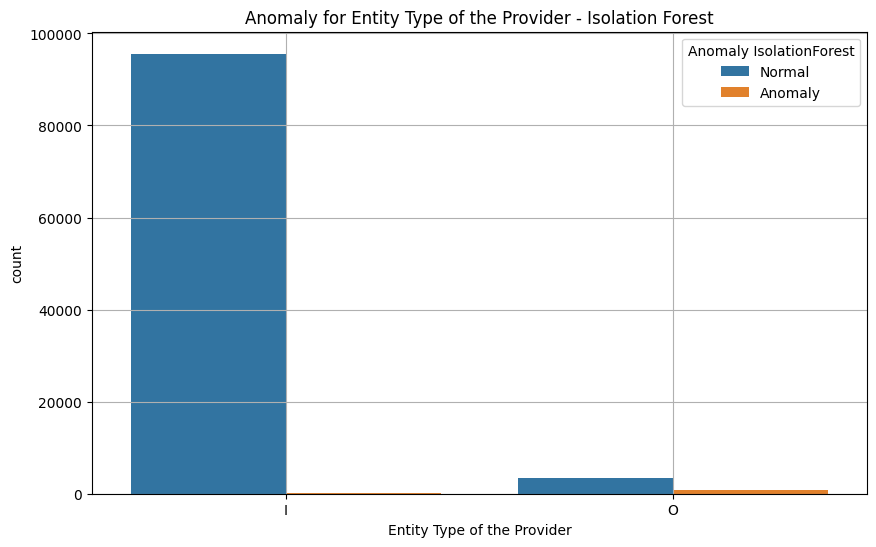

In [50]:
# count plot for Entity Type of the Provider
plt.figure(figsize=(10, 6))
sns.countplot(org_df,x='Entity Type of the Provider',hue='Anomaly IsolationForest')
plt.title('Anomaly for Entity Type of the Provider - Isolation Forest')
plt.grid(True)
plt.show()

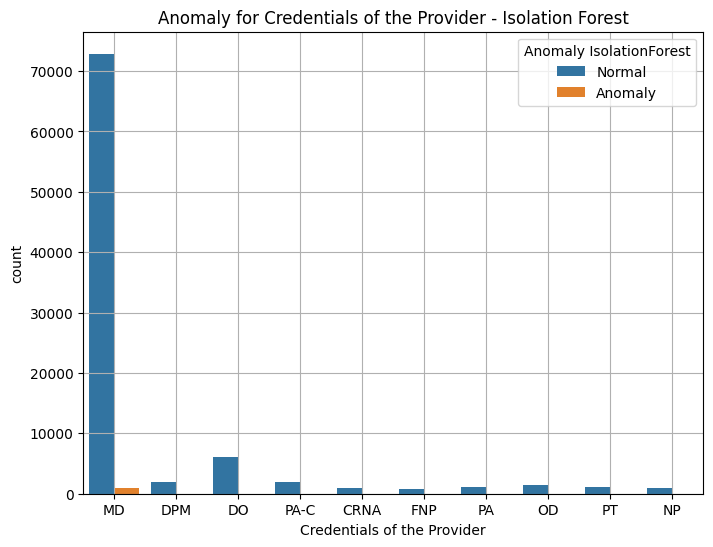

In [51]:
# Identify the top 10 categories
top_10_categories = org_df['Credentials of the Provider'].value_counts().head(10).index
top_10_data = org_df[org_df['Credentials of the Provider'].isin(top_10_categories)]
# count plot for the top 10 Provider type
plt.figure(figsize=(8, 6))
sns.countplot(top_10_data,x='Credentials of the Provider',hue='Anomaly IsolationForest')
plt.title('Anomaly for Credentials of the Provider - Isolation Forest')
plt.grid(True)
plt.show()

* In All the above bar plots blue bara shows the count of normal points 
* The orange bars shows the count of anomalies present in the dataset for the different categories

## 2- Elliptic Envelope

In [52]:
# Apply Elliptic Envelope
from sklearn.covariance import EllipticEnvelope
elliptic_env = EllipticEnvelope(contamination=0.01, random_state=42)
elliptic_env.fit(scaled_df)
anomaly_predictions = elliptic_env.predict(scaled_df)

In [53]:
df[anomaly_predictions==-1]

,Credentials of the Provider,City of the Provider,State Code of the Provider,Provider Type,HCPCS Code,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,...,Country Code of the Provider_DE,Country Code of the Provider_JP,Country Code of the Provider_TR,Country Code of the Provider_US,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,Place of Service_F,Place of Service_O,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y
79,6176,13,1997,3098,49,1568.0,20.0,22.0,12.528068,15.000000,...,False,False,False,True,False,True,False,True,False,True
120,73827,118,2792,1745,27,15000.0,12.0,20.0,1.060300,3.900000,...,False,False,False,True,False,True,False,True,False,True
234,73827,124,1136,727,90,1620.0,19.0,27.0,16.891630,35.666667,...,False,False,False,True,False,True,False,True,False,True
337,73827,60,2020,2495,33,5234.0,26.0,60.0,5.974026,10.387658,...,False,False,False,True,False,True,False,True,False,True
563,73827,611,2858,1794,21,70700.0,22.0,311.0,0.023652,0.130000,...,False,False,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99576,113,634,2791,12537,12,15600.0,77.0,78.0,0.210269,1.000000,...,False,False,False,True,False,True,False,True,False,True
99593,73827,40,171,1745,37,1970.0,59.0,197.0,21.903467,88.970000,...,False,False,False,True,False,True,False,True,False,True
99872,73827,400,4561,727,6,43000.0,14.0,113.0,7.481456,8.000000,...,False,False,False,True,False,True,False,True,False,True
99914,73827,5,7775,512,13,34.0,25.0,34.0,3605.580000,8500.000000,...,False,False,False,True,False,True,True,False,True,False


* according to the Ellopic envelope algorithm, The no of present of anomalies present in the dataset are 1000.
* Above rows are the one which is anomalies in the dataset.

In [54]:
# Create a column as Anomaly Elliptic Envelope 
org_df['Anomaly EllipticEnvelope']=anomaly_predictions
org_df['Anomaly EllipticEnvelope'] = org_df['Anomaly EllipticEnvelope'].replace({1: 'Normal', -1: 'Anomaly'})

In [55]:
org_df.head()

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Anomaly IsolationForest,Anomaly EllipticEnvelope
0,MD,F,I,SAINT LOUIS,MO,US,Internal Medicine,Y,F,99223,N,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889,Normal,Normal
1,MD,F,I,FAYETTEVILLE,NC,US,Obstetrics & Gynecology,Y,O,G0202,N,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257,Normal,Normal
2,DPM,M,I,NORTH HAVEN,CT,US,Podiatry,Y,O,99348,N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937,Normal,Normal
3,MD,M,I,KANSAS CITY,MO,US,Internal Medicine,Y,O,81002,N,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000,Normal,Normal
4,DO,M,I,JUPITER,FL,US,Internal Medicine,Y,O,96372,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576,Normal,Normal


## Visualization for the Elliptic Envelope results

**Scatter plots for the different features having normal and anomalous points**

In [56]:
# Map the anomaly labels to colors
colors = np.array(['b', 'r'])  # Normal points: blue, Anomalies: red
anomaly_col = np.where(anomaly_predictions == 1, colors[0], colors[1])

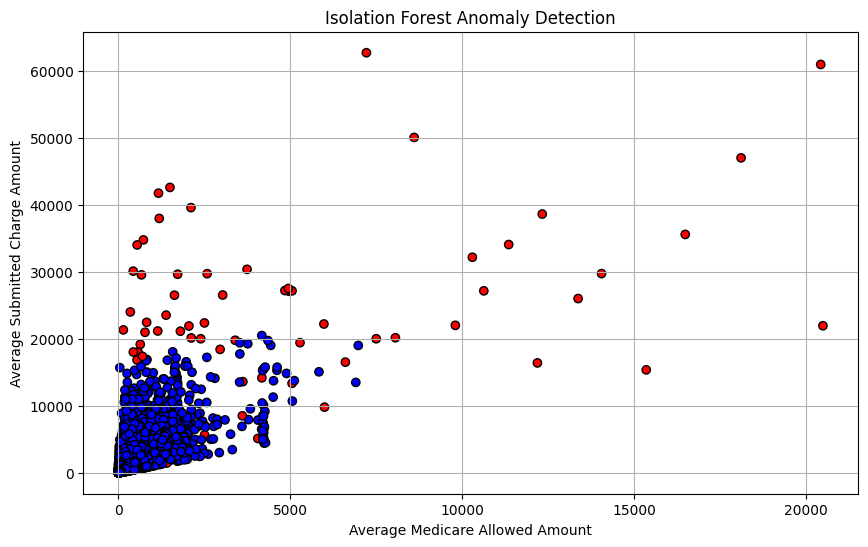

In [57]:
# Visualize the results
features = df[['Average Medicare Allowed Amount', 'Average Submitted Charge Amount']].values
plt.figure(figsize=(10, 6))
plt.scatter(features[:, 0], features[:, 1], c=anomaly_col, marker='o', edgecolor='k')
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Average Medicare Allowed Amount')
plt.ylabel('Average Submitted Charge Amount')
plt.grid(True)
plt.show()

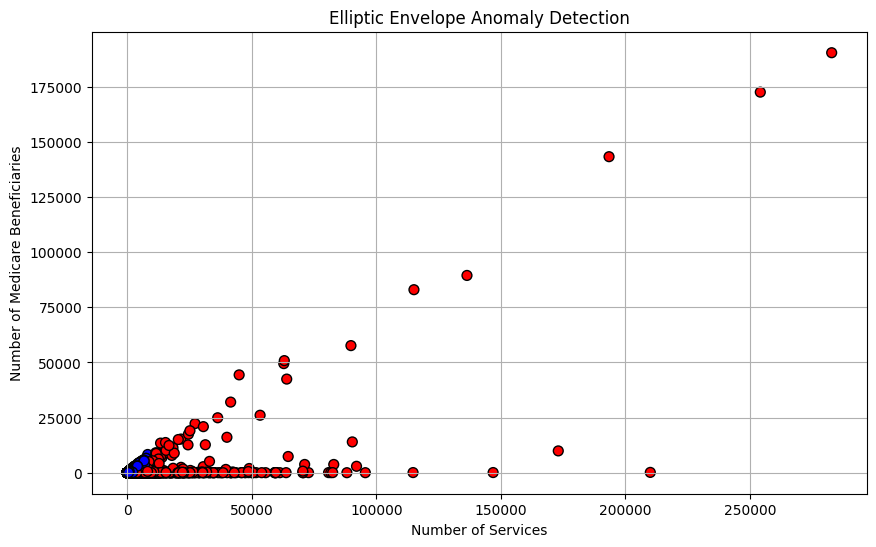

In [58]:
# scatter plot for 'Number of Services and NUmber of Medicare Beneficiaries'
features = df[['Number of Services', 'Number of Medicare Beneficiaries']].values
plt.figure(figsize=(10, 6))
plt.scatter(features[:, 0], features[:, 1], c=anomaly_col, marker='o', edgecolor='k', s=50)
plt.title('Elliptic Envelope Anomaly Detection')
plt.xlabel('Number of Services')
plt.ylabel('Number of Medicare Beneficiaries')
plt.grid(True)
plt.show()

* In the above plot we can see the two region in which there are two type of points red and blue
* Red points shows the anomalies and Blue points shows the normal transaction in the dataset. 

**Barplot for the different features**

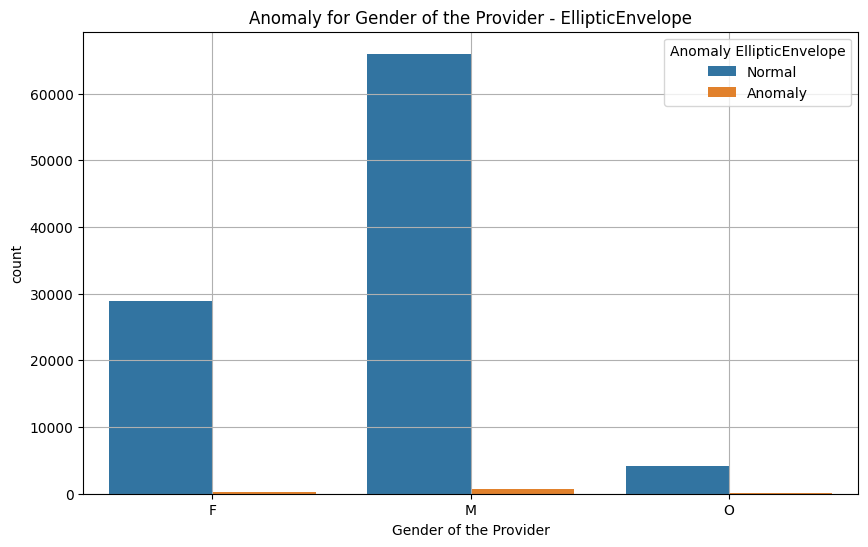

In [59]:
# plot for 'Gender of the Provider'
plt.figure(figsize=(10, 6))
sns.countplot(org_df,x='Gender of the Provider',hue='Anomaly EllipticEnvelope')
plt.title('Anomaly for Gender of the Provider - EllipticEnvelope')
plt.grid(True)
plt.show()

* The above pot shows the count plot for the gender of the provider
* There are three type of Gender of the provider- Male, Female and Organization
* clearly we can see the normal and anomalies count for the gender of the providers 

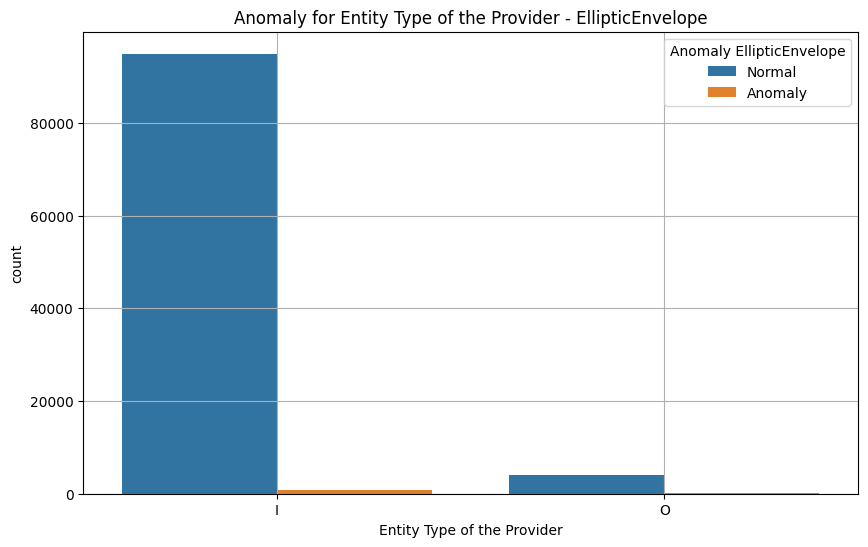

In [60]:
plt.figure(figsize=(10, 6))
sns.countplot(org_df,x='Entity Type of the Provider',hue='Anomaly EllipticEnvelope')
plt.title('Anomaly for Entity Type of the Provider - EllipticEnvelope')
plt.grid(True)
plt.show()

* According to the above plot we can see the type of provider individual and organization.
* I category stands for individual type of provider.
* O category stands for organization type of provider.
* Blue and orange bars shows us the count of normal and fraudulent transactions in the dataset.

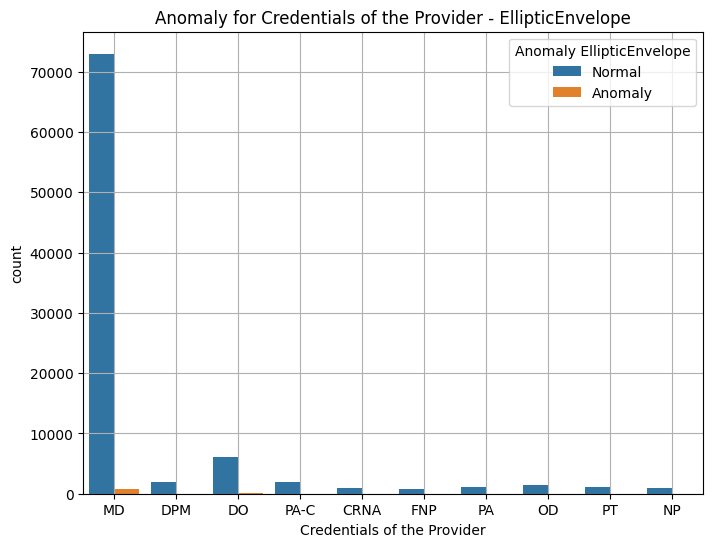

In [61]:
# Identify the top 10 categories
top_10_categories = org_df['Credentials of the Provider'].value_counts().head(10).index
top_10_data = org_df[org_df['Credentials of the Provider'].isin(top_10_categories)]
# count plot for the top 10 Provider type
plt.figure(figsize=(8, 6))
sns.countplot(top_10_data,x='Credentials of the Provider',hue='Anomaly EllipticEnvelope')
plt.title('Anomaly for Credentials of the Provider - EllipticEnvelope')
plt.grid(True)
plt.show()

* The above plot shows that the top 10 credentials of the provider.
* Also shows the normal and anomalies count of credential of the provider.

## OneClassSvm

In [ ]:
from sklearn.svm import OneClassSVM

# Apply One-Class SVM
oneclass_svm = OneClassSVM(nu=0.2, kernel='rbf', gamma='scale')
oneclass_svm.fit(scaled_df)
anomaly_labels_oc = oneclass_svm.predict(scaled_df)

In [ ]:
df[anomaly_labels_oc==-1]

In [ ]:
# Create a column as Anomaly Elliptic Envelope 
org_df['Anomaly OneClassSvm']=anomaly_labels_oc
org_df['Anomaly OneClassSvm'] = org_df['OneClassSvm'].replace({1: 'Normal', -1: 'Anomaly'})

## Visualization of OneClassSvm anomalies

**Scattor plots**

In [ ]:
# Map the anomaly labels to colors
colors = np.array(['b', 'r'])  # Normal points: blue, Anomalies: red
anomaly_colors_oc = np.where(anomaly_labels_oc == 1, colors[0], colors[1])

cols = df[['Average Medicare Allowed Amount', 'Average Submitted Charge Amount']].values

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(cols[:, 0], cols[:, 1], c=anomaly_colors_oc, marker='o', edgecolor='k', s=50)
plt.title('One-Class SVM Anomaly Detection')
plt.xlabel('Average Medicare Allowed Amount')
plt.ylabel('Average Submitted Charge Amount')
plt.grid(True)
plt.show()


In [ ]:
# scatter plot for 'Number of Services and NUmber of Medicare Beneficiaries'
features = df[['Number of Services', 'Number of Medicare Beneficiaries']].values
plt.figure(figsize=(10, 6))
plt.scatter(features[:, 0], features[:, 1], c=anomaly_colors_oc, marker='o', edgecolor='k', s=50)
plt.title('Elliptic Envelope Anomaly Detection')
plt.xlabel('Number of Services')
plt.ylabel('Number of Medicare Beneficiaries')
plt.grid(True)
plt.show()

**Bar plot fot for the different categorical features**

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(org_df,x='Gender of the Provider',hue='Anomaly OneClassSvm')
plt.title('Anomaly for Gender of the Provider - EllipticEnvelope')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(org_df,x='Entity Type of the Provider',hue='Anomaly OneClassSvm')
plt.title('Anomaly for Entity Type of the Provider - EllipticEnvelope')
plt.grid(True)
plt.show()

In [ ]:
# Identify the top 10 categories
top_10_categories = org_df['Credentials of the Provider'].value_counts().head(10).index
top_10_data = org_df[org_df['Credentials of the Provider'].isin(top_10_categories)]
# count plot for the top 10 Provider type
plt.figure(figsize=(8, 6))
sns.countplot(top_10_data,x='Credentials of the Provider',hue='Anomaly OneClassSvm')
plt.title('Anomaly for Credentials of the Provider - EllipticEnvelope')
plt.grid(True)
plt.show()

In [ ]:
org_df.head()

**Conclusion**
* In this notebook I have have performed all the three algorithm IsolationForest, Elliptic Envelope and OneClassSvm for the anomaly detection
* Trained all the above three models with using different parameter for the effective results   
* Performed visualization for results of every algorithm by scatter plot for numerical variable and bar plot for the categorical variable.
